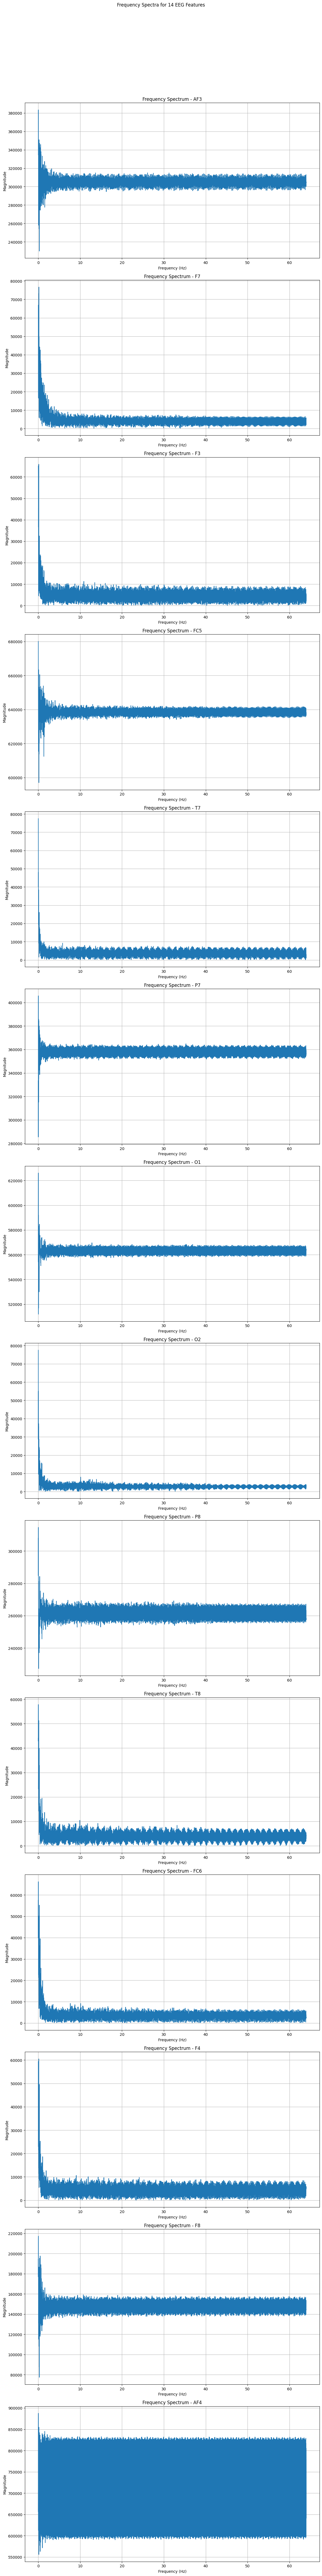

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("EEG_Eye_State_Classification.csv")

# Define the number of samples and duration
num_samples = 14980
total_duration = 117  # seconds
sample_rate = num_samples / total_duration  # Samples per second (Hz)

# Calculate the frequency bins
frequencies = np.fft.fftfreq(num_samples, d=1/sample_rate)

# Create a figure with multiple subplots for each EEG feature
plt.figure(figsize=(12, 100))  # Adjust the size to accommodate 14 subplots
plt.suptitle("Frequency Spectra for 14 EEG Features")

# Iterate over each feature to plot its frequency spectrum
num_features = 14
for i in range(num_features):
    feature_name = data.columns[i]
    signal = data[feature_name]

    # Perform FFT and get the magnitude
    fft_output = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_output)

    # Create a subplot for each feature
    plt.subplot(num_features, 1, i + 1)
    plt.plot(frequencies[1:num_samples // 2], fft_magnitude[1:num_samples // 2])  # Plot only positive frequencies
    plt.title(f"Frequency Spectrum - {feature_name}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
